In [77]:
import numpy as np
import gensim
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Embedding, Flatten, merge, SimpleRNN
from keras.optimizers import Adam
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.visualize_util import plot
from keras.utils.visualize_util import model_to_dot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
import pickle

In [78]:
corpora = gensim.corpora.Dictionary.load('./data/corpora.dat')
vocab_size = len(corpora)
print('Number of words in corpora: %d'%(vocab_size))

Number of words in corpora: 26


In [79]:
tmp = list(corpora.items())

In [80]:
#the_filename = './data/wonderland.txt.dat'
the_filename = './data/test.txt.dat'
with open(the_filename, 'rb') as f:
    text = pickle.load(f)

### Generate words patterns - 2 words model

In [81]:
cs = 2

In [82]:
c_in_dat = [[text[i+n] for i in range(0, len(text)-cs, cs)]
            for n in range(cs)]

In [83]:
c_out_dat = [text[i+cs] for i in range(0, len(text)-cs, cs)]

In [84]:
xs = [np.stack(c[:-2]) for c in c_in_dat]

In [85]:
len(xs), xs[0].shape

(2, (12,))

In [86]:
y = np.stack(c_out_dat[:-2])

In [87]:
[xs[n][:cs] for n in range(cs)]

[array([2, 4]), array([0, 8])]

In [88]:
y[:cs]

array([4, 3])

In [89]:
n_hidden=256
n_fac=4

In [90]:
model=Sequential([
        Embedding(vocab_size, n_fac, input_length=cs),
        SimpleRNN(n_hidden, activation='relu', inner_init='identity'),
        Dense(vocab_size, activation='softmax')
    ])

In [91]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [92]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_6 (Embedding)          (None, 2, 4)          104         embedding_input_5[0][0]          
____________________________________________________________________________________________________
simplernn_5 (SimpleRNN)          (None, 256)           66816       embedding_6[0][0]                
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 26)            6682        simplernn_5[0][0]                
Total params: 73602
____________________________________________________________________________________________________


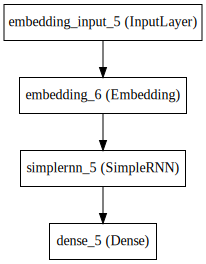

In [93]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [94]:
model.fit(np.stack(xs,1), y, batch_size=1, nb_epoch=100)

Epoch 1/100
12/12 [==============================] - 0s - loss: 3.2593     
Epoch 2/100
12/12 [==============================] - 0s - loss: 3.2069     
Epoch 3/100
12/12 [==============================] - 0s - loss: 3.1392     
Epoch 4/100
12/12 [==============================] - 0s - loss: 2.9994     
Epoch 5/100
12/12 [==============================] - 0s - loss: 2.7832     
Epoch 6/100
12/12 [==============================] - 0s - loss: 2.5002     
Epoch 7/100
12/12 [==============================] - 0s - loss: 2.3413     
Epoch 8/100
12/12 [==============================] - 0s - loss: 2.2143     
Epoch 9/100
12/12 [==============================] - 0s - loss: 2.0971     
Epoch 10/100
12/12 [==============================] - 0s - loss: 1.9562     
Epoch 11/100
12/12 [==============================] - 0s - loss: 1.7968     
Epoch 12/100
12/12 [==============================] - 0s - loss: 1.6804     
Epoch 13/100
12/12 [==============================] - 0s - loss: 1.4642     
Epoch 14

In [95]:
model.save('./models/dev_fast_ai_first_RNN_keras.h5')

### Test model

In [96]:
def get_next_keras(inp):
    idxs = [corpora.token2id[c] for c in inp]
    arrs = np.array(idxs)[np.newaxis,:]
    p = model.predict(arrs)[0]
    return corpora.id2token[np.argmax(p)]

In [97]:
get_next_keras(['One', 'two'])

'three'